In [199]:
#Import packages and Functions
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import random
import re
%run Functions.ipynb


/Users/liameliot/Documents/DA 401


## Clean 2023 Real ELO df

https://www.sports-reference.com/cfb/years/2022-schedule.html

In [153]:
real = pd.read_csv('RealELO.csv')

def clean_team_name(name):
    # Regex pattern to match "(number) " at the start of the string
    return re.sub(r"^\(\d+\)\s*", "", name)

# Apply the function to the 'team' column
real['Winner'] = real['Winner'].apply(clean_team_name)
real['Loser'] = real['Loser'].apply(clean_team_name)
real = real.rename(columns={'Wk': 'Week'})

In [200]:
# ELO parameters
initial_elo = 1500
k = 85  # K-factor for ELO rating adjustments

# Initialize a dictionary to store the ELO ratings
elo_ratings = {}

# Function to get a team's ELO rating (initialize at 1500 if not found)
def get_elo(team):
    return elo_ratings.get(team, initial_elo)

# Function to update ELO ratings after a game
def update_elo(winner, loser):
    winner_elo = get_elo(winner)
    loser_elo = get_elo(loser)

    # Calculate expected scores
    expected_winner = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))
    expected_loser = 1 / (1 + 10 ** ((winner_elo - loser_elo) / 400))

    # Update ratings
    new_winner_elo = winner_elo + k * (1 - expected_winner)
    new_loser_elo = loser_elo + k * (0 - expected_loser)

    # Save the new ratings
    elo_ratings[winner] = new_winner_elo
    elo_ratings[loser] = new_loser_elo

    # Calculate ELO difference
    elo_difference = abs(winner_elo - loser_elo)
    return elo_difference

# List to store the ELO differences for each matchup
elo_differences = []

# Calculate ELO ratings and differences for each game
for index, row in real.iterrows():
    winner = row["Winner"]
    loser = row["Loser"]
    
    # Update ELO ratings and get the ELO difference for the game
    elo_difference = update_elo(winner, loser)
    elo_differences.append(elo_difference)

# Calculate the average ELO difference across all games
average_elo_difference = sum(elo_differences) / len(elo_differences)

print("Average ELO difference per matchup:", average_elo_difference)

Average ELO difference per matchup: 82.562019934565


## Simulate 2024-2028 Seasons (Every Run Resets Results)

In [296]:
# Initialize list to store each CBR5Year value from each simulation
cbr_values = []

# Run the simulation 100 times
for i in range(100):
    %run PRS.ipynb  # Run the simulation
    
    # Calculate CBR for each year as before
    CBR24 = (Tier_1_CBR_24 + Tier_2_CBR_24 + Tier_3_CBR_24 + Tier_4_CBR_24) / 4
    CBR25 = (Tier_1_CBR_25 + Tier_2_CBR_25 + Tier_3_CBR_25 + Tier_4_CBR_25) / 4
    CBR26 = (Tier_1_CBR_26 + Tier_2_CBR_26 + Tier_3_CBR_26 + Tier_4_CBR_26) / 4
    CBR27 = (Tier_1_CBR_27 + Tier_2_CBR_27 + Tier_3_CBR_27 + Tier_4_CBR_27) / 4
    CBR28 = (Tier_1_CBR_28 + Tier_2_CBR_28 + Tier_3_CBR_28 + Tier_4_CBR_28) / 4
    
    # Calculate the 5-year average CBR for this simulation
    CBR5Year = (CBR24 + CBR25 + CBR26 + CBR27 + CBR28) / 5
    
    # Store this CBR5Year value in the list
    cbr_values.append(CBR5Year)

# Calculate the average of all 100 CBR5Year values
average_cbr = sum(cbr_values) / len(cbr_values)
average_cbr

/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameli

17.827126095281866

In [300]:
cbrmeans = pd.DataFrame(cbr_values, columns=['Mean CBR'])
cbrmeans.to_csv('cbrmeans.csv', index=False)


In [298]:
cbr_values
average_cbr

17.827126095281866

In [277]:
%run PRS.ipynb



/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401


In [206]:
minhome = cfb25['Home Games'].min()
minhome = cfb25[cfb25['Home Games'] == minhome]
minhome

maxhome = cfb25['Home Games'].max()
maxhome = cfb25[cfb25['Home Games'] == maxhome]
#maxhome

## Home / Away

In [187]:
value_counts = cfb24['Away Games'].value_counts()

# Display the result
print("Unique values and their counts:")
value_counts

Unique values and their counts:


6    69
5    29
7    24
8     5
4     4
9     2
3     1
Name: Away Games, dtype: int64

## 5 Year CBR

In [212]:
CBR24 = (Tier_1_CBR_24 + Tier_2_CBR_24 + Tier_3_CBR_24 + Tier_4_CBR_24) / 4
CBR25 = (Tier_1_CBR_25 + Tier_2_CBR_25 + Tier_3_CBR_25 + Tier_4_CBR_25) / 4
CBR26 = (Tier_1_CBR_26 + Tier_2_CBR_26 + Tier_3_CBR_26 + Tier_4_CBR_26) / 4
CBR27 = (Tier_1_CBR_27 + Tier_2_CBR_27 + Tier_3_CBR_27 + Tier_4_CBR_27) / 4
CBR28 = (Tier_1_CBR_28 + Tier_2_CBR_28 + Tier_3_CBR_28 + Tier_4_CBR_28) / 4


CBR5Year = (CBR24 + CBR25 + CBR26 + CBR27 + CBR28) / 5

CBR5Year


17.11818106617647

In [217]:
cfb24.to_csv('cfb24(test).csv', index=False)

In [273]:
hey = pd.read_csv('Confix.csv')
conf = hey.iloc[:, :2]
conf = conf.rename(columns={'School': 'Team'})
conf = conf.rename(columns={'Conf': 'Conference'})

,Team,Conference
0,Air Force,MWC
1,Akron,MAC
2,Alabama,SEC
3,Appalachian State,Sun Belt
4,Arizona,Big 12
...,...,...
129,West Virginia,Big 12
130,Western Kentucky,CUSA
131,Western Michigan,MAC
132,Wisconsin,Big Ten


Only Run Once

In [278]:
# 2024
cfb24 = cfb24.merge(conf, on='Team', how='left')
cfb24.loc[cfb24['Team'] == 'UMass', 'Conference'] = 'Ind'

#2025
cfb25 = cfb25.merge(conf, on='Team', how='left')
cfb25.loc[cfb25['Team'] == 'UMass', 'Conference'] = 'Ind'

#2026
cfb26 = cfb26.merge(conf, on='Team', how='left')
cfb26.loc[cfb26['Team'] == 'UMass', 'Conference'] = 'Ind'

#2027
cfb27 = cfb27.merge(conf, on='Team', how='left')
cfb27.loc[cfb27['Team'] == 'UMass', 'Conference'] = 'Ind'

#2028
cfb28 = cfb28.merge(conf, on='Team', how='left')
cfb28.loc[cfb28['Team'] == 'UMass', 'Conference'] = 'Ind'

final_stats = pd.concat([cfb24, cfb25, cfb26, cfb27, cfb28], ignore_index=True)

In [280]:
final_stats = final_stats.merge(pnl[['Team', 'ELO']], on='Team', how='left')
final_stats = final_stats.rename(columns={'ELO': 'Original ELO'})

final_stats

,Team,Wins,Losses,Starting ELO,Week 12 ELO,Starting Rank,Week 12 Rank,Home Games,Away Games,Tier,Year,Conference,Original ELO
0,Ohio State,10,2,1613.036667,2017.0,5,1,6,6,Tier 1,2024,Big Ten,1613.036667
1,Texas A&M,9,3,1501.823333,1847.0,30,3,6,6,Tier 1,2024,SEC,1501.823333
2,Notre Dame,9,3,1585.423333,1877.0,12,2,6,6,Tier 1,2024,Ind,1585.423333
3,Clemson,7,5,1586.436667,1776.0,10,6,4,8,Tier 1,2024,ACC,1586.436667
4,Georgia,7,5,1675.990000,1834.0,1,4,6,6,Tier 1,2024,SEC,1675.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Hawaii,6,6,996.550000,1039.0,27,25,7,5,Tier 4,2028,MWC,1331.615000
666,Wyoming,5,7,909.150000,903.0,29,31,6,6,Tier 4,2028,MWC,1420.535000
667,Buffalo,4,8,1036.450000,937.0,24,29,7,5,Tier 4,2028,MAC,1403.181667
668,Colorado State,3,9,1113.400000,905.0,20,30,5,7,Tier 4,2028,MWC,1362.205000


In [281]:
final_stats.to_csv('final_stats.csv', index=False)

In [283]:
final_stats = final_stats.merge(cfb24[['Team', 'Tier']], on='Team', how='left')
df = df.drop(columns=['Tier_x'])
final_stats

,Team,Wins,Losses,Starting ELO,Week 12 ELO,Starting Rank,Week 12 Rank,Home Games,Away Games,Tier_x,Year,Conference,Original ELO,Tier_y
0,Ohio State,10,2,1613.036667,2017.0,5,1,6,6,Tier 1,2024,Big Ten,1613.036667,Tier 1
1,Texas A&M,9,3,1501.823333,1847.0,30,3,6,6,Tier 1,2024,SEC,1501.823333,Tier 1
2,Notre Dame,9,3,1585.423333,1877.0,12,2,6,6,Tier 1,2024,Ind,1585.423333,Tier 1
3,Clemson,7,5,1586.436667,1776.0,10,6,4,8,Tier 1,2024,ACC,1586.436667,Tier 1
4,Georgia,7,5,1675.990000,1834.0,1,4,6,6,Tier 1,2024,SEC,1675.990000,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Hawaii,6,6,996.550000,1039.0,27,25,7,5,Tier 4,2028,MWC,1331.615000,Tier 4
666,Wyoming,5,7,909.150000,903.0,29,31,6,6,Tier 4,2028,MWC,1420.535000,Tier 3
667,Buffalo,4,8,1036.450000,937.0,24,29,7,5,Tier 4,2028,MAC,1403.181667,Tier 3
668,Colorado State,3,9,1113.400000,905.0,20,30,5,7,Tier 4,2028,MWC,1362.205000,Tier 4


In [286]:
final_stats = final_stats.drop(columns=['Tier_x'])
final_stats = final_stats.rename(columns={'Tier_y': 'Starting Tier'})
final_stats

KeyError: "['Tier_x'] not found in axis"

In [287]:
final_stats = final_stats.rename(columns={'Tier_y': 'Starting Tier'})
final_stats

,Team,Wins,Losses,Starting ELO,Week 12 ELO,Starting Rank,Week 12 Rank,Home Games,Away Games,Year,Conference,Original ELO,Starting Tier
0,Ohio State,10,2,1613.036667,2017.0,5,1,6,6,2024,Big Ten,1613.036667,Tier 1
1,Texas A&M,9,3,1501.823333,1847.0,30,3,6,6,2024,SEC,1501.823333,Tier 1
2,Notre Dame,9,3,1585.423333,1877.0,12,2,6,6,2024,Ind,1585.423333,Tier 1
3,Clemson,7,5,1586.436667,1776.0,10,6,4,8,2024,ACC,1586.436667,Tier 1
4,Georgia,7,5,1675.990000,1834.0,1,4,6,6,2024,SEC,1675.990000,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Hawaii,6,6,996.550000,1039.0,27,25,7,5,2028,MWC,1331.615000,Tier 4
666,Wyoming,5,7,909.150000,903.0,29,31,6,6,2028,MWC,1420.535000,Tier 3
667,Buffalo,4,8,1036.450000,937.0,24,29,7,5,2028,MAC,1403.181667,Tier 3
668,Colorado State,3,9,1113.400000,905.0,20,30,5,7,2028,MWC,1362.205000,Tier 4


In [288]:
final_stats.to_csv('final_stats1.csv', index=False)

In [289]:

17.11818106617647 / 82.562019934565

0.2073372366584972

In [290]:
cfb28

,Team,Wins,Losses,Starting ELO,Week 12 ELO,Starting Rank,Week 12 Rank,Home Games,Away Games,Tier,Year,Conference
0,Ohio,11,1,2272.40,2436.0,1,1,6,6,Tier 1,2028,MAC
1,ULM,6,6,1995.95,2159.0,2,3,7,5,Tier 1,2028,Sun Belt
2,Middle Tennessee,8,4,1889.55,2173.0,7,2,7,5,Tier 1,2028,CUSA
3,Georgia Tech,6,6,1916.15,2050.0,6,6,2,10,Tier 1,2028,ACC
4,Troy,7,5,1950.35,2097.0,5,4,6,6,Tier 1,2028,Sun Belt
...,...,...,...,...,...,...,...,...,...,...,...,...
129,Hawaii,6,6,996.55,1039.0,27,25,7,5,Tier 4,2028,MWC
130,Wyoming,5,7,909.15,903.0,29,31,6,6,Tier 4,2028,MWC
131,Buffalo,4,8,1036.45,937.0,24,29,7,5,Tier 4,2028,MAC
132,Colorado State,3,9,1113.40,905.0,20,30,5,7,Tier 4,2028,MWC


In [337]:
lastszn = tier1
lastszn = lastszn.merge(cfb28[['Team', 'Week 12 ELO']], on='Team', how='left')
lastszn = lastszn.sort_values(by='Week 12 ELO', ascending=False)

lastszn

,Team,ELO,Home Games,Away Games,Year,Week 12 ELO
2,Liberty,2036.80,6,6,2027,2306.0
8,SMU,1867.70,7,5,2027,2243.0
4,Alabama,1965.55,6,6,2027,2150.0
5,Duke,1924.70,6,6,2027,2143.0
10,Troy,1835.40,6,6,2027,2097.0
1,Wisconsin,2041.55,4,8,2027,2057.0
9,North Carolina,1853.45,7,5,2027,2018.0
17,UCF,1749.90,3,9,2027,2008.0
11,Akron,1830.65,6,6,2027,1989.0
3,Indiana,1992.15,7,5,2027,1981.0


In [356]:
lastszn_list = []

# Run the simulation 10 times
for i in range(10):
    # Run the simulation
    %run PRS.ipynb
    
    # Generate the top 25 teams dataframe
    lastszn = tier1
    lastszn = lastszn.merge(cfb28[['Team', 'Week 12 ELO']], on='Team', how='left')
    lastszn = lastszn.sort_values(by='Week 12 ELO', ascending=False)
    lastszn = lastszn.iloc[:-9]
    
    # Append the dataframe to the list
    lastszn_list.append(lastszn)

/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401


In [357]:
combined_df = pd.concat(lastszn_list, ignore_index=True)
combined_df

,Team,ELO,Home Games,Away Games,Year,Week 12 ELO
0,Iowa State,1926.60,6,6,2027,2324.0
1,Utah,2157.45,6,6,2027,2225.0
2,Ole Miss,1803.10,5,7,2027,2158.0
3,Memphis,1759.40,6,6,2027,2098.0
4,Fresno State,1824.00,4,8,2027,2084.0
...,...,...,...,...,...,...
245,Washington,1907.60,4,8,2027,1814.0
246,Stanford,1707.15,4,8,2027,1793.0
247,Eastern Michigan,1705.25,7,5,2027,1782.0
248,Kansas,1671.05,7,5,2027,1758.0


In [341]:
hey = pd.read_csv('Confix.csv')
conf = hey.iloc[:, :2]
conf = conf.rename(columns={'School': 'Team'})
conf = conf.rename(columns={'Conf': 'Conference'})

In [358]:
combined_df = combined_df.merge(conf, on='Team', how='left')
combined_df

,Team,ELO,Home Games,Away Games,Year,Week 12 ELO,Conference
0,Iowa State,1926.60,6,6,2027,2324.0,Big 12
1,Utah,2157.45,6,6,2027,2225.0,Big 12
2,Ole Miss,1803.10,5,7,2027,2158.0,SEC
3,Memphis,1759.40,6,6,2027,2098.0,American
4,Fresno State,1824.00,4,8,2027,2084.0,MWC
...,...,...,...,...,...,...,...
245,Washington,1907.60,4,8,2027,1814.0,Big Ten
246,Stanford,1707.15,4,8,2027,1793.0,ACC
247,Eastern Michigan,1705.25,7,5,2027,1782.0,MAC
248,Kansas,1671.05,7,5,2027,1758.0,Big 12


In [343]:
combined_df.to_csv('combined_df.csv', index=False)

In [361]:
pf = 50+43+37+34
pfp = (pf/250) * 100
100 - pfp

34.39999999999999

In [359]:
conference_counts = combined_df['Conference'].value_counts()

conference_counts_df = conference_counts.reset_index()

# Rename the columns for clarity
conference_counts_df.columns = ['Conference', 'Appearances in Tier 1']

# View the resulting DataFrame
conference_counts_df

,Conference,Appearances in Tier 1
0,Big Ten,50
1,Big 12,43
2,SEC,37
3,ACC,34
4,MAC,21
5,Sun Belt,21
6,American,16
7,MWC,15
8,CUSA,7
9,Ind,6


In [349]:
npf = 3+4+7+4+8

In [350]:
npfp = (npf / 125) * 100
npfp

20.8

In [373]:
bottom4 = pnl.tail(32)

In [393]:
team_counts = []

# Run the simulation 10 times
for i in range(100):
    # Run the simulation
    %run PRS.ipynb
    
    # Get the values from the "Team" column in bottom4
    teams_from_bottom4 = bottom4['Team']
    
    # Count how many times these teams appear in the "Team" column of tier1
    matches = tier2['Team'].isin(teams_from_bottom4)
    
    # Sum the number of True matches and append to the list
    count_matches = matches.sum()
    team_counts.append(count_matches)

# team_counts now contains the number of teams for each run
print(team_counts)

/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameliot/Documents/DA 401
/Users/liameli

In [394]:
total = sum(team_counts)

# Find the average
average = total / len(team_counts)

# View the result
print(average)


7.79


In [396]:
tier1appearances = 4.76
tier2appearances = 7.79
tier3appearances = 8.55
tier4appearances = 10.91

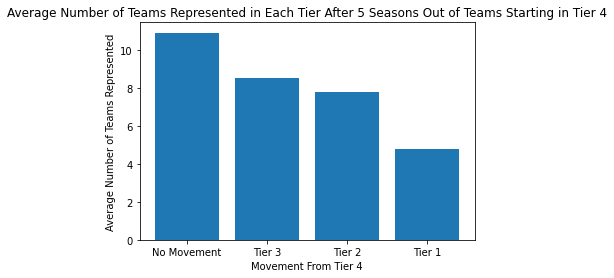

In [399]:
import matplotlib.pyplot as plt

# Data for the bars
categories = ['No Movement', 'Tier 3', 'Tier 2', 'Tier 1']
values = [tier4appearances, tier3appearances, tier2appearances, tier1appearances]

# Create the bar graph
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Movement From Tier 4')
plt.ylabel('Average Number of Teams Represented')
plt.title('Average Number of Teams Represented in Each Tier After 5 Seasons Out of Teams Starting in Tier 4')

# Show the plot
plt.show()